In [203]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import os
import pickle
import mne

In [2]:
cd MOABB_ERP_data/

C:\Users\Admin\Documents\BMI_mid_project\MOABB_ERP_data


In [204]:
NU_data   = 'data_allsubjects.pickle'
ALS_data  = 'ALSdata.pickle'
EPFLP_data = 'EPFLP300.pickle'
BNCI_data = 'BNCI2015003.pickle'

### Load dataset
Load EEG data for visualization

In [205]:
# Datasets
itemname = [NU_data, ALS_data, EPFLP_data, BNCI_data]

In [206]:
def loaddata(filename):
    with open(filename, 'rb') as handle:
        data = pickle.load(handle)
    return data

import pickle

for item in itemname:
    filename = item
    data = loaddata(filename)
    print('EEG data is 3D numpy array (trials x channels x time samples) ---->')
    print('Number of subjects in %s: %d' % (item, len(data)))
    count = 0
    for subject in range(len(data)):
        print('Subject', subject, ':', data[subject].get_data().shape)
        count += data[subject].get_data().shape[0]
    print('Total : (', count, ',', data[subject].get_data().shape[1], ',', 
          data[subject].get_data().shape[2], ')')
    print(" ")

EEG data is 3D numpy array (trials x channels x time samples) ---->
Number of subjects in data_allsubjects.pickle: 16
Subject 0 : (3982, 16, 76)
Subject 1 : (3916, 16, 76)
Subject 2 : (2053, 16, 76)
Subject 3 : (6516, 16, 76)
Subject 4 : (3396, 16, 76)
Subject 5 : (3975, 16, 76)
Subject 6 : (1163, 16, 76)
Subject 7 : (1174, 16, 76)
Subject 8 : (4139, 16, 76)
Subject 9 : (4047, 16, 76)
Subject 10 : (4060, 16, 76)
Subject 11 : (4067, 16, 76)
Subject 12 : (4083, 16, 76)
Subject 13 : (4024, 16, 76)
Subject 14 : (2263, 16, 76)
Subject 15 : (3809, 16, 76)
Total : ( 56667 , 16 , 76 )
 
EEG data is 3D numpy array (trials x channels x time samples) ---->
Number of subjects in ALSdata.pickle: 8
Subject 0 : (4200, 8, 78)
Subject 1 : (4200, 8, 78)
Subject 2 : (4200, 8, 78)
Subject 3 : (4200, 8, 78)
Subject 4 : (4200, 8, 78)
Subject 5 : (4200, 8, 78)
Subject 6 : (4200, 8, 78)
Subject 7 : (4200, 8, 78)
Total : ( 33600 , 8 , 78 )
 
EEG data is 3D numpy array (trials x channels x time samples) ---->
N


BNCI Data info 
---



In [218]:
data = loaddata(itemname[3])

In [219]:
# select data from a specific subject and use it for demostration
subject = 0
s1 = data[subject] # s1['Target']
print(s1)

<Epochs |  5400 events (all good), 0 - 0.992188 sec, baseline off, ~42.2 MB, data loaded,
 'Target': 150
 'NonTarget': 5250>


In [220]:
################ For specific subject case ###################
def get_subject_data(subject):
    epochs = subject.pick_types(eeg=True)
    X = epochs.get_data()
    y = epochs.events[:, -1]
    return X, y

X, y = get_subject_data(s1)

for s in range(len(data)):
    subject = data[s]
    X, y = get_subject_data(subject)
    #X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state=42, stratify = y)

Channel x time samples : (8, 128)


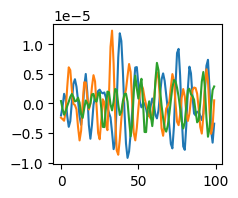

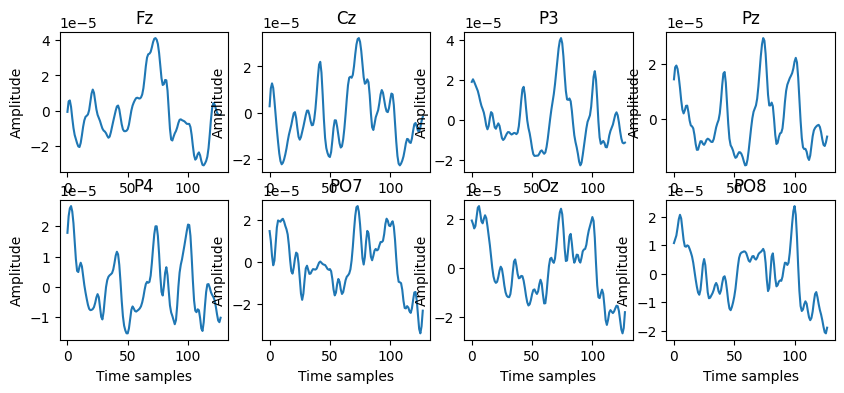

In [221]:
trial = 1
x = s1['NonTarget'].get_data()[trial,:,:]
print('Channel x time samples :', x.shape)

ch_names = s1.info['ch_names']

plt.figure(figsize=(10, 4))
for i, j in enumerate(ch_names):
    plt.subplot(2, 4, i+1)
    plt.plot(x[i, :])
    plt.title(j)
    plt.ylabel('Amplitude')
    plt.xlabel('Time samples')

plt.show()

In [222]:
def average_over_trials(channel, tg):
    outer = list()
    for i in range(s1.get_data().shape[2]):
        inner = []
        x3 = s1[tg].get_data()[:,channel,:]
        a = x3[:, i].mean()
        outer.append(a)
    return outer

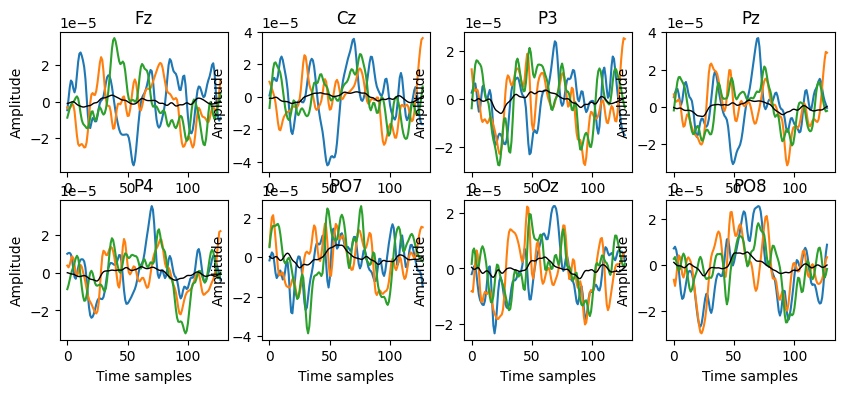

In [223]:
plt.figure(figsize=(10, 4))
for i, j in enumerate(ch_names):
    plt.subplot(2, 4, i+1)
    for trial in range(3):
        x = s1['Target'].get_data()[trial,:,:]
        plt.plot(x[i, :])
    xx = np.arange(0, 128)
    outer = average_over_trials(i, 'Target')
    plt.plot(xx, outer, 'k-', label='line 1', linewidth=1)
    plt.title(j)
    plt.ylabel('Amplitude')
    plt.xlabel('Time samples')

plt.show()

### Apply common-average reference

In [36]:
s1.set_eeg_reference(ref_channels='average')

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


<Epochs |  5400 events (all good), 0 - 0.992188 sec, baseline off, ~42.2 MB, data loaded,
 'Target': 150
 'NonTarget': 5250>

Channel x time samples : (8, 128)


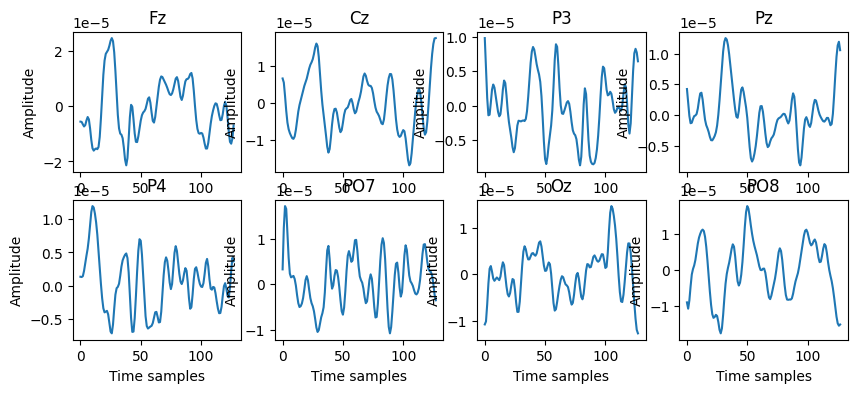

In [37]:
trial = 1
x = s1['Target'].get_data()[trial,:,:]
print('Channel x time samples :', x.shape)

ch_names = s1.info['ch_names']

plt.figure(figsize=(10, 4))
for i, j in enumerate(ch_names):
    plt.subplot(2, 4, i+1)
    plt.plot(x[i, :])
    plt.title(j)
    plt.ylabel('Amplitude')
    plt.xlabel('Time samples')

plt.show()

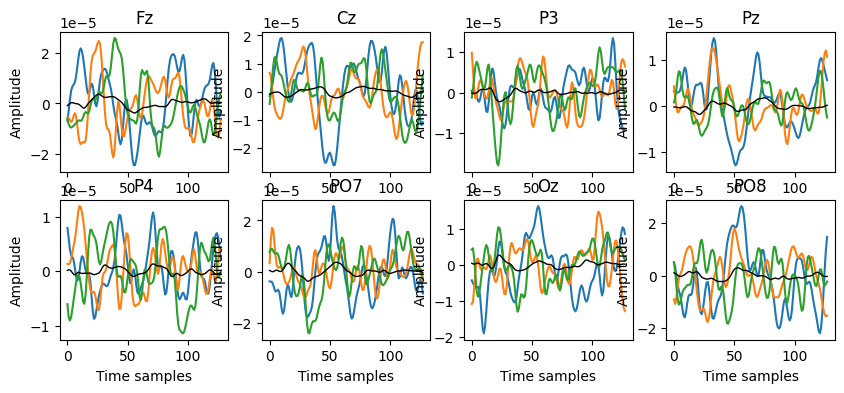

In [38]:
plt.figure(figsize=(10, 4))
for i, j in enumerate(ch_names):
    plt.subplot(2, 4, i+1)
    for trial in range(3):
        x = s1['Target'].get_data()[trial,:,:]
        plt.plot(x[i, :])
    xx = np.arange(0, 128)
    outer = average_over_trials(i, 'Target')
    plt.plot(xx, outer, 'k-', label='line 1', linewidth=1)
    plt.title(j)
    plt.ylabel('Amplitude')
    plt.xlabel('Time samples')

plt.show()

### Band-pass filter


In [39]:
s1.filter(l_freq = 8, h_freq = 30)

Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 213 samples (1.664 sec)



C:\Users\Admin\AppData\Local\Temp\ipykernel_19992\3534965321.py:1: RuntimeWarning: filter_length (213) is longer than the signal (128), distortion is likely. Reduce filter length or filter a longer signal.
  s1.filter(l_freq = 8, h_freq = 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 43200 out of 43200 | elapsed:    6.0s finished


<Epochs |  5400 events (all good), 0 - 0.992188 sec, baseline off, ~42.2 MB, data loaded,
 'Target': 150
 'NonTarget': 5250>

Channel x time samples : (8, 128)


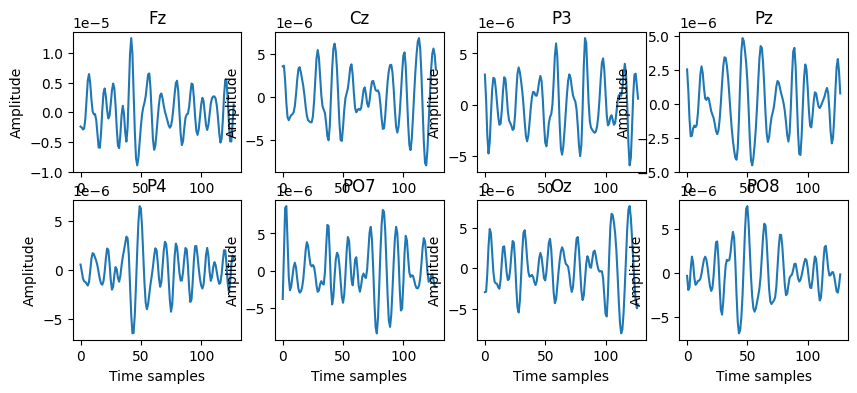

In [40]:
trial = 1
x = s1['Target'].get_data()[trial,:,:]
print('Channel x time samples :', x.shape)

ch_names = s1.info['ch_names']

plt.figure(figsize=(10, 4))
for i, j in enumerate(ch_names):
    plt.subplot(2, 4, i+1)
    plt.plot(x[i, :])
    plt.title(j)
    plt.ylabel('Amplitude')
    plt.xlabel('Time samples')

plt.show()

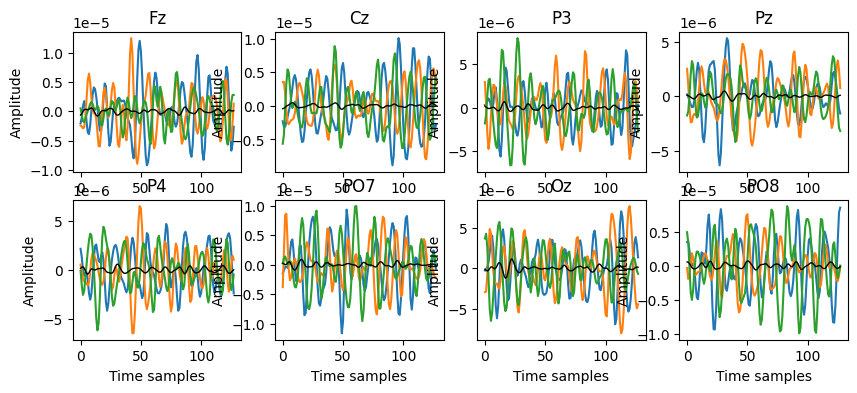

In [41]:
plt.figure(figsize=(10, 4))
for i, j in enumerate(ch_names):
    plt.subplot(2, 4, i+1)
    for trial in range(3):
        x = s1['Target'].get_data()[trial,:,:]
        plt.plot(x[i, :])
    xx = np.arange(0, 128)
    outer = average_over_trials(i, 'Target')
    plt.plot(xx, outer, 'k-', label='line 1', linewidth=1)
    plt.title(j)
    plt.ylabel('Amplitude')
    plt.xlabel('Time samples')

plt.show()

Channel x time samples : (8, 128)
Channel x time samples : (8, 128)


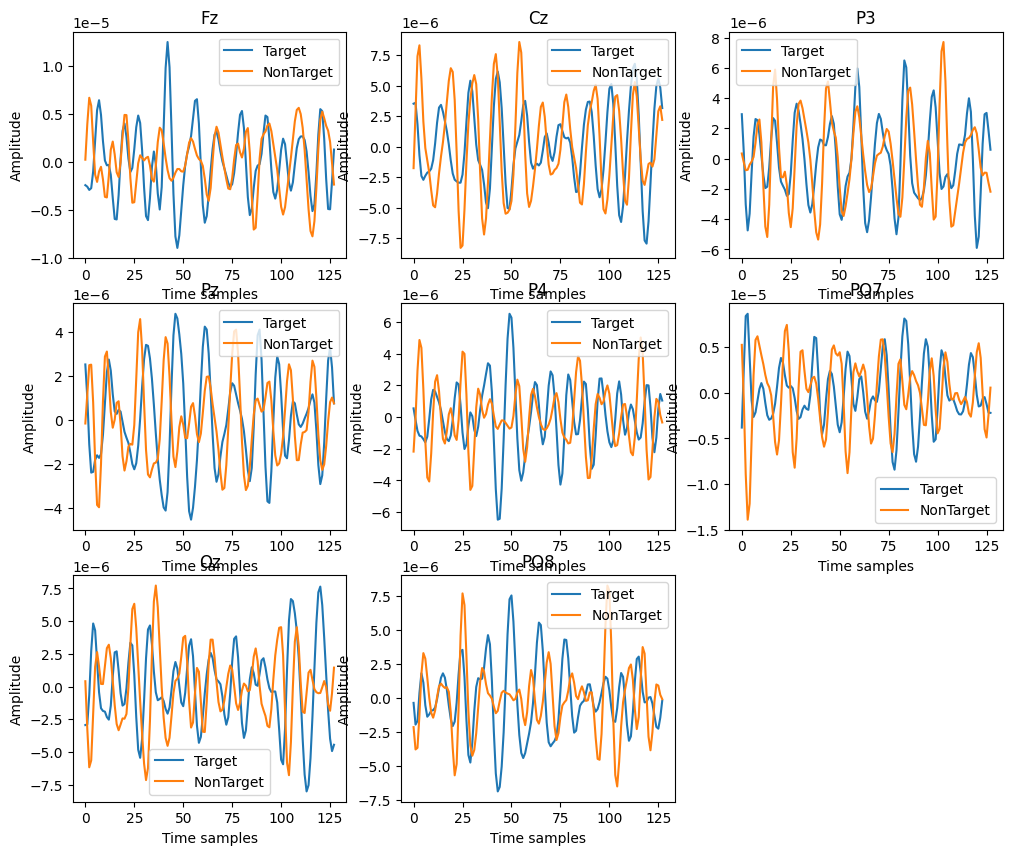

In [68]:
s1 = data[0]

trial = 1
x = s1['Target'].get_data()[trial,:,:]
print('Channel x time samples :', x.shape)

x2 = s1['NonTarget'].get_data()[trial,:,:]
print('Channel x time samples :', x2.shape)

ch_names = s1.info['ch_names']

plt.figure(figsize=(12, 10))
for i, j in enumerate(ch_names):
    plt.subplot(3, 3, i+1)
    plt.plot(x[i, :], label = 'Target')
    plt.plot(x2[i, :], label = 'NonTarget')
    plt.legend()
    plt.title(j)
    plt.ylabel('Amplitude')
    plt.xlabel('Time samples')

plt.show()

In [42]:
target = s1['Target']
nontarget = s1['NonTarget']

In [61]:
#diff = mne.combine_evoked((target.average(), -nontarget.average()), weights='equal')
#diff.plot_joint(times=[0.1, 0.2, 0.3, 0.37, 0.5]); #times=[0.1, 0.2, 0.3, 0.37, 0.5]
#diff.plot_image()

In [8]:
#s1['NonTarget'].plot();
#s1['Target'].plot();

In [11]:
X,y = [],[]

for i in range(len(data)):
    #data[i] = data[i].set_eeg_reference(ref_channels='average')
    epoch = data[i].pick_types(eeg=True)
    d = epoch.get_data()
    X.append(d)    
    l = epoch.events[:, -1]
    y.append(l)

In [12]:
nX = np.concatenate(X)
nX = np.reshape(nX,[25200, 8*128])

In [13]:
nY = np.empty(shape = y[0].shape)
for i in range(len(y)):
    nY = np.concatenate([nY,y[i]])
nY = np.concatenate(y)

In [14]:
print(nX.shape)
print(nY.shape)

(25200, 1024)
(25200,)


In [15]:
# To split the data in 80:10:10 for train:valid:test dataset
# First, I will split the data in training and remaining temporary dataset
X_train, X_temp, y_train, y_temp = train_test_split(nX, nY, train_size = 0.8, random_state=42, stratify = nY)

# Second, I will divide the remaining temp dataset 50 by 50
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size = 0.5, random_state=42)

print("Train dataset")
print(X_train.shape), print(y_train.shape)
print(" ")
print("Validation dataset")
print(X_valid.shape), print(y_valid.shape)
print(" ")
print("Test dataset")
print(X_test.shape), print(y_test.shape)

Train dataset
(20160, 1024)
(20160,)
 
Validation dataset
(2520, 1024)
(2520,)
 
Test dataset
(2520, 1024)
(2520,)


(None, None)

## ICA decomposition

In [69]:
ica = mne.preprocessing.ICA(n_components=8, random_state=0) #n_components = less than or equal to the number of channels

In [71]:
ica.fit(data[0].copy().filter(8, 35))

Setting up band-pass filter from 8 - 35 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 35.00 Hz
- Upper transition bandwidth: 8.75 Hz (-6 dB cutoff frequency: 39.38 Hz)
- Filter length: 213 samples (1.664 sec)



C:\Users\Admin\AppData\Local\Temp\ipykernel_19992\3467437591.py:1: RuntimeWarning: filter_length (213) is longer than the signal (128), distortion is likely. Reduce filter length or filter a longer signal.
  ica.fit(data[0].copy().filter(8, 35))
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 8 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 43200 out of 43200 | elapsed:    6.2s finished


Selecting by number: 8 components
Fitting ICA took 3.3s.


C:\Users\Admin\AppData\Local\Temp\ipykernel_19992\3467437591.py:1: RuntimeWarning: Using n_components=8 (resulting in n_components_=8) may lead to an unstable mixing matrix estimation because the ratio between the largest (2.9) and smallest (2.9e-30) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 7
  ica.fit(data[0].copy().filter(8, 35))


<ICA | epochs decomposition, method: fastica (fit in 19 iterations on 691200 samples), 8 ICA components (8 PCA components available), channel types: eeg, no sources marked for exclusion>

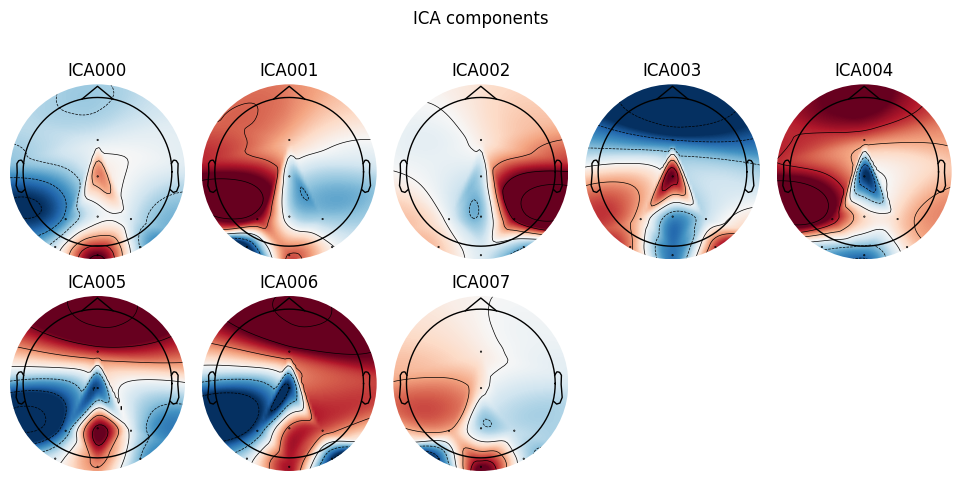

[<MNEFigure size 975x496 with 8 Axes>]

In [72]:
ica.plot_components(sensors=True) 

In [ ]:
# we can store bad ones
ica.exclude = [0, 7]

In [74]:
bad_idx, scores = ica.find_bads_eog(data[0], 'Fz', threshold=1.5)

Using EOG channel: Fz


In [75]:
ica.exclude = bad_idx

In [76]:
print(bad_idx)

[6, 7]


Using matplotlib as 2D backend.


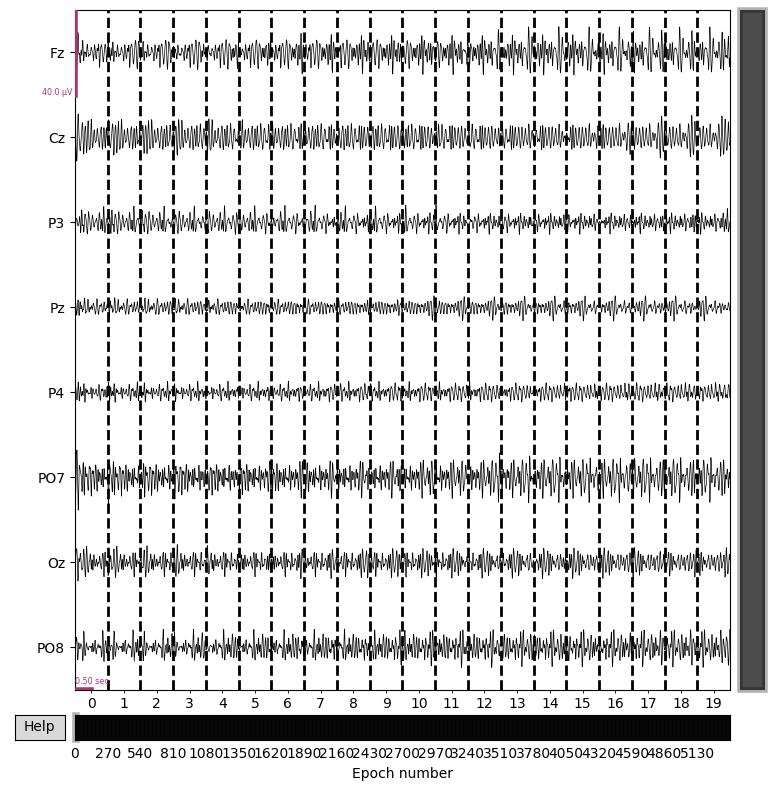

In [79]:
#Let's compare raw and corrected data ...#
data[0].plot(n_channels=8);

Applying ICA to Epochs instance
    Transforming to ICA space (8 components)
    Zeroing out 2 ICA components
    Projecting back using 8 PCA components


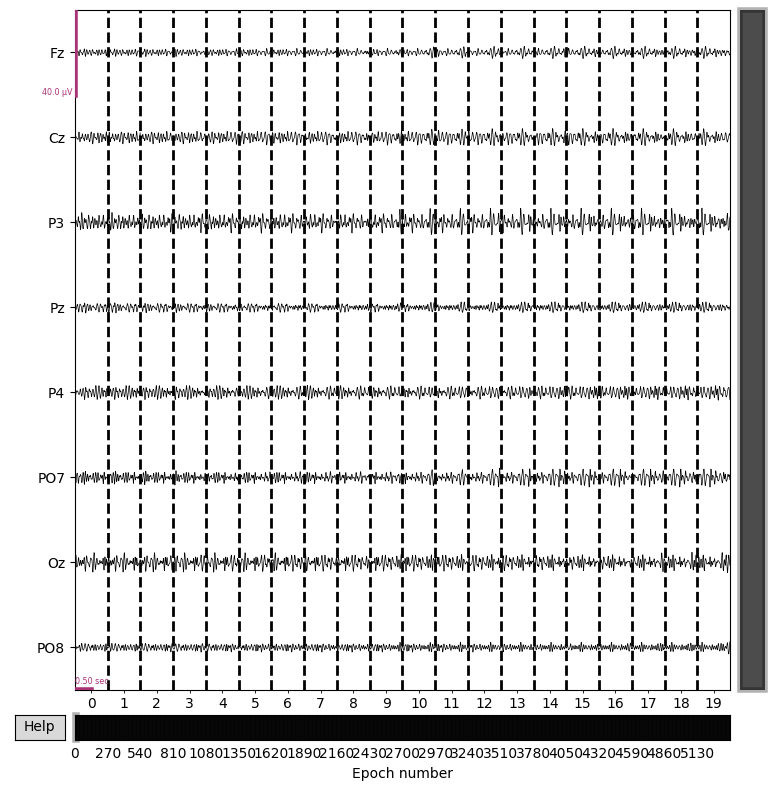

In [80]:
ica.apply(data[0].copy(), exclude=ica.exclude).plot(n_channels=8);

In [84]:
s1 = ica.apply(data[0].copy(), exclude=ica.exclude)
#epochs = ica.apply(epochs, exclude=ica.exclude)

Applying ICA to Epochs instance
    Transforming to ICA space (8 components)
    Zeroing out 2 ICA components
    Projecting back using 8 PCA components


In [92]:
s1.get_data()[1,:,:].shape

(8, 128)

In [100]:
dir(target)

['__class__',
 '__contains__',
 '__deepcopy__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__next__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_bad_dropped',
 '_channel_type_idx',
 '_check_consistency',
 '_check_metadata',
 '_compute_aggregate',
 '_current',
 '_data',
 '_decim',
 '_decim_slice',
 '_detrend_offset_decim',
 '_detrend_picks',
 '_do_delayed_proj',
 '_evoked_from_epoch_data',
 '_filename',
 '_get_channel_positions',
 '_get_data',
 '_get_epoch_from_raw',
 '_getitem',
 '_handle_tmin_tmax',
 '_is_good_epoch',
 '_item_to_select',
 '_keys_to_idx',
 '_metadata',
 '_name',
 '_offset',
 '_pick_drop_channels',
 '_pick_projs',
 '_project_epoch',
 '_projector',
 '_raw',
 '_

In [115]:
target = s1['Target']

In [112]:
target.get_data().shape

(150, 8, 128)

In [124]:
target.apply_baseline((None, None), verbose=None)

Applying baseline correction (mode: mean)


<Epochs |  150 events (all good), 0 - 0.992188 sec, baseline 0 – 0.992188 sec, ~1.2 MB, data loaded,
 'Target': 150>

In [125]:
target.get_data().shape

(150, 8, 128)

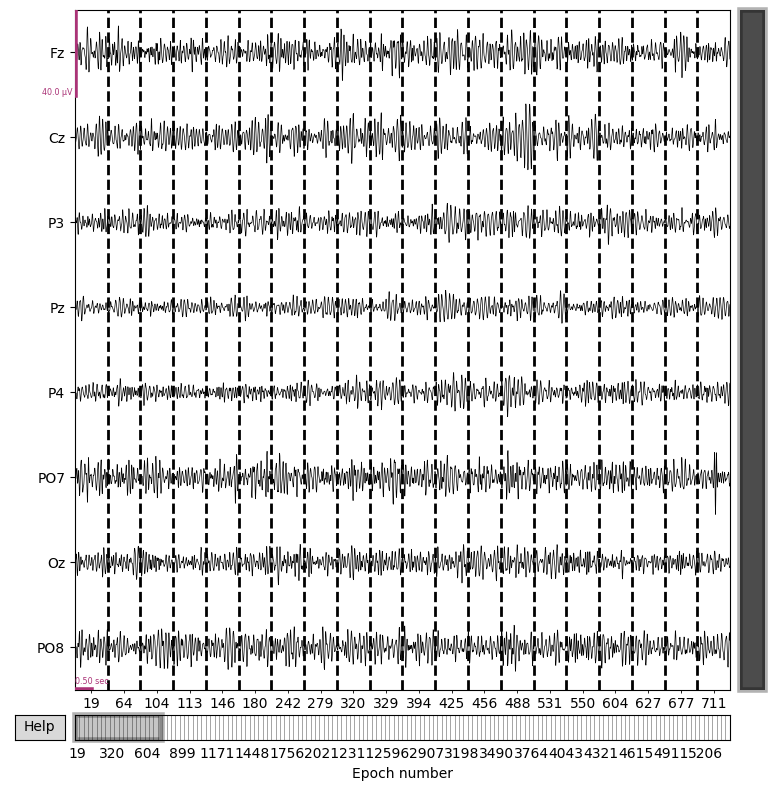

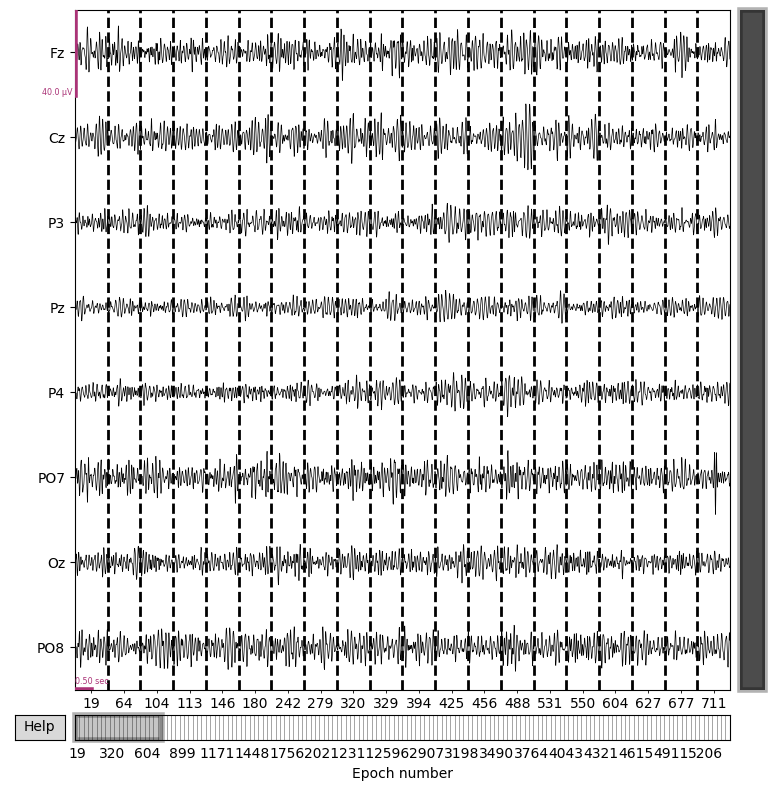

In [103]:
target.plot();

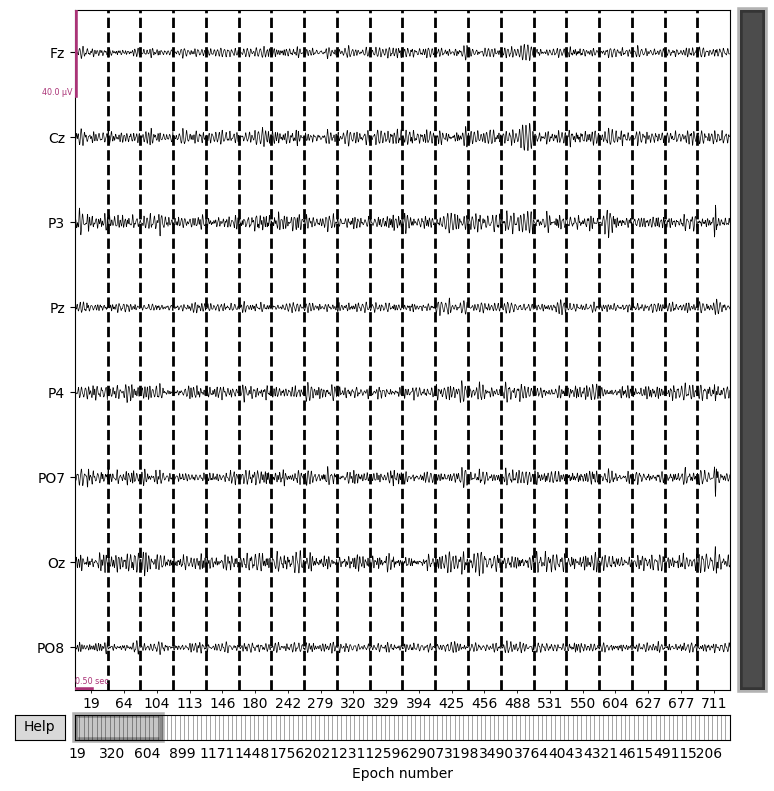

In [126]:
target.plot();

In [127]:
target = s1['Target']
nontarget = s1['NonTarget']

No projector specified for this dataset. Please consider the method self.add_proj.


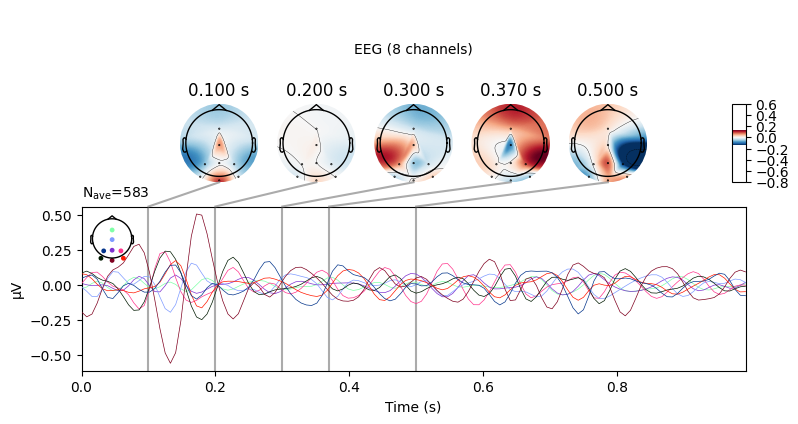

In [130]:
diff = mne.combine_evoked((target.average(), -nontarget.average()), weights='equal')
diff.plot_joint(times=[0.1, 0.2, 0.3, 0.37, 0.5]);

In [133]:
ch_names

['Fz', 'Cz', 'P3', 'Pz', 'P4', 'PO7', 'Oz', 'PO8']

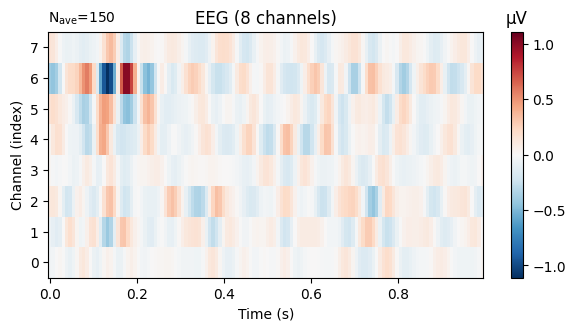

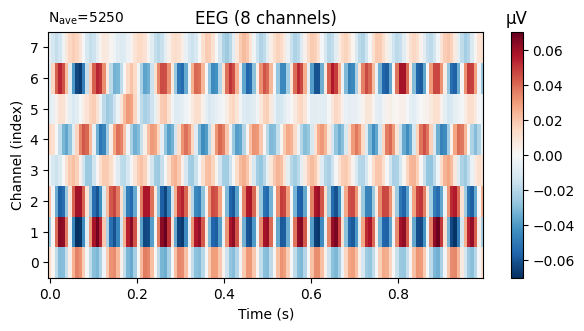

In [161]:
#diff.plot_image(picks=['Cz', 'P3', 'P4', 'PO7', 'PO8'], exclude='bads');
#diff.plot_image(exclude='bads');
#diff.plot_image(picks=['Fz', 'Pz']);
target.average().plot_image();
nontarget.average().plot_image();

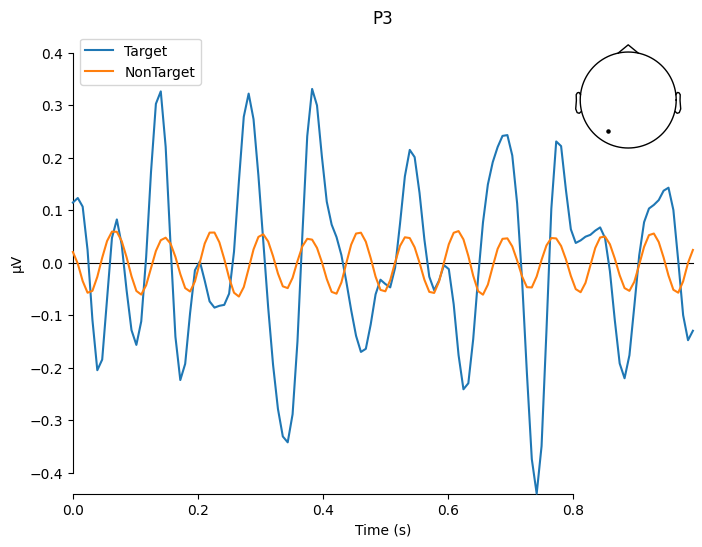

In [166]:
mne.viz.plot_compare_evokeds({"Target": target.average(), "NonTarget": nontarget.average()}, picks=[2]);

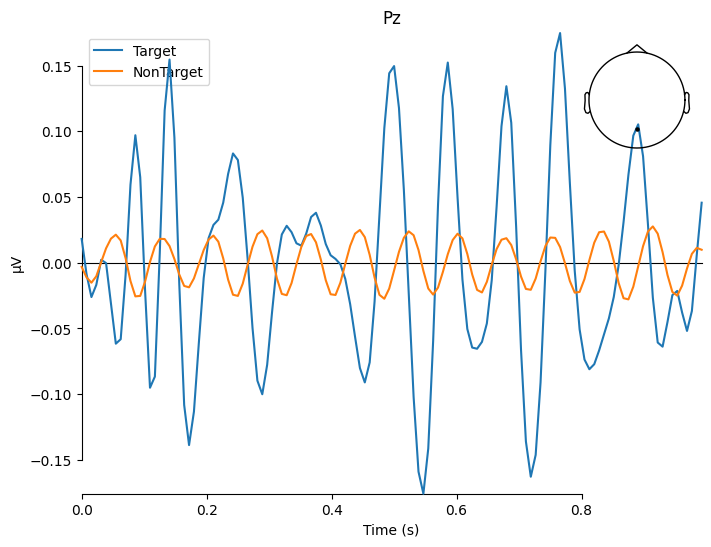

In [167]:
mne.viz.plot_compare_evokeds({"Target": target.average(), "NonTarget": nontarget.average()}, picks=[3]);

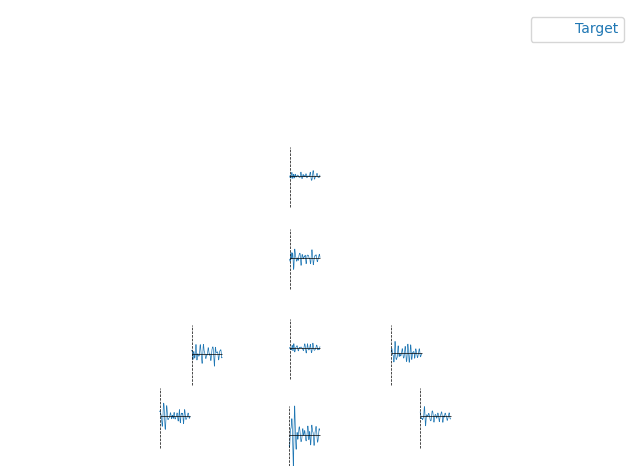

In [173]:
target.average().plot_topo();

In [195]:
s1.filter(1, None, fir_design='firwin')

Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 423 samples (3.305 sec)



C:\Users\Admin\AppData\Local\Temp\ipykernel_19992\3208006901.py:1: RuntimeWarning: filter_length (423) is longer than the signal (128), distortion is likely. Reduce filter length or filter a longer signal.
  s1.filter(1, None, fir_design='firwin')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 43200 out of 43200 | elapsed:    5.0s finished


<Epochs |  5400 events (all good), 0 - 0.992188 sec, baseline off, ~42.2 MB, data loaded,
 'Target': 150
 'NonTarget': 5250>

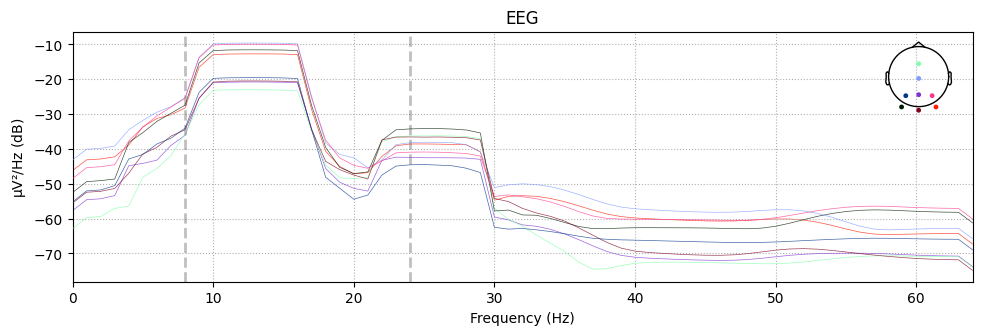

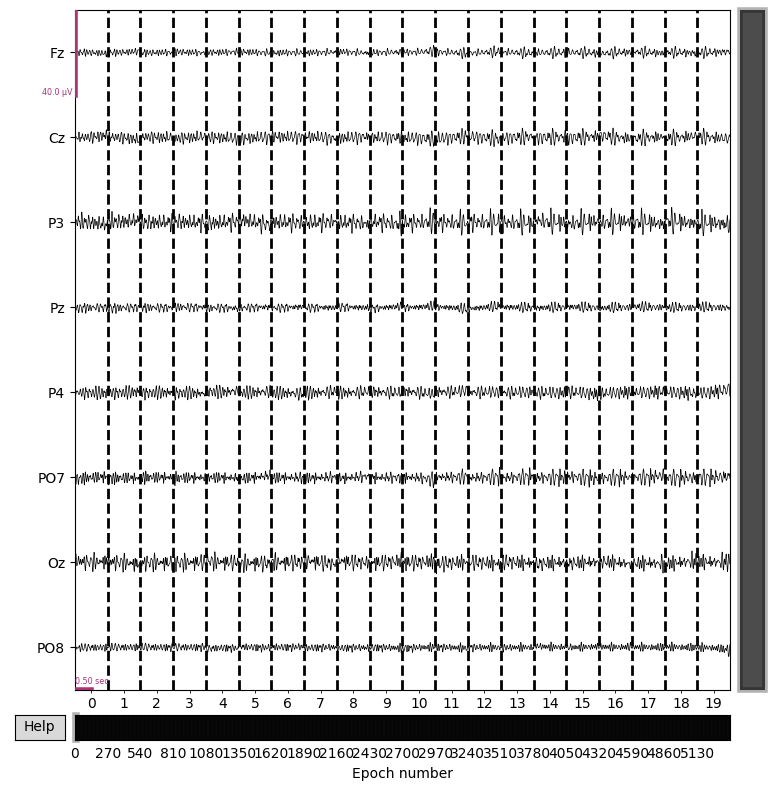

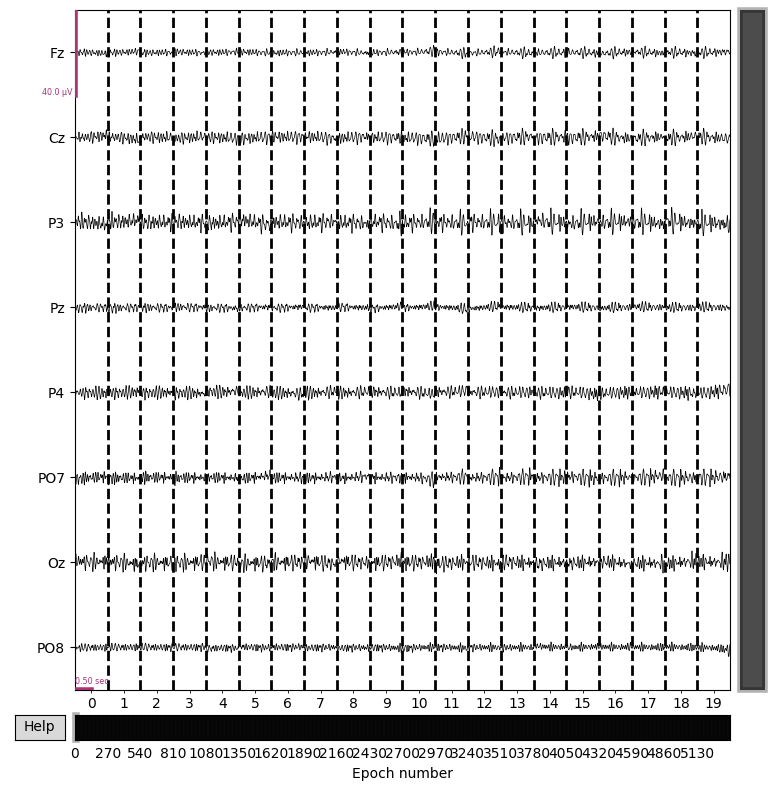

In [193]:
s1.plot()

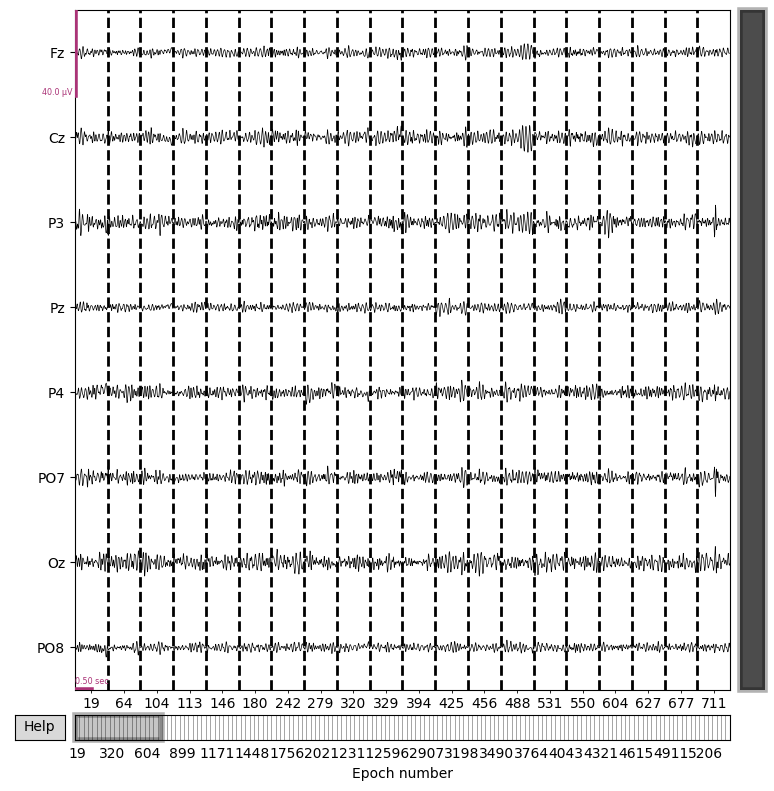

In [196]:
s1['Target'].plot();